In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulated data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add x0 = 1 to each instance (for intercept)
X_b = np.c_[np.ones((100, 1)), X]


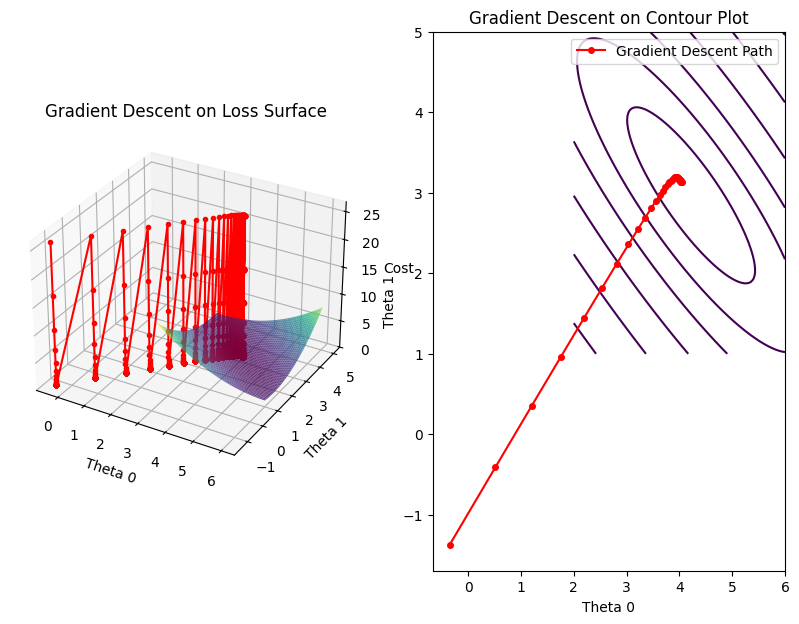

In [3]:
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gradient computation
def compute_gradient(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    gradients = (1 / m) * X.T.dot(predictions - y)
    return gradients

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []
    theta_history = [theta.copy()]
    for _ in range(iterations):
        gradients = compute_gradient(theta, X, y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(theta, X, y))
        theta_history.append(theta.copy())
    return theta, cost_history, theta_history

theta = np.random.randn(2, 1)
learning_rate = 0.1
iterations = 50

theta_final, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

# Plot the loss function surface
theta0_range = np.linspace(2, 6, 100)
theta1_range = np.linspace(1, 5, 100)
theta0, theta1 = np.meshgrid(theta0_range, theta1_range)

Z = np.array([compute_cost(np.array([[t0], [t1]]), X_b, y) for t0, t1 in zip(np.ravel(theta0), np.ravel(theta1))])
Z = Z.reshape(theta0.shape)

fig = plt.figure(figsize=(10, 7))

# 3D Plot
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0, theta1, Z, cmap='viridis', alpha=0.8)
theta_history_array = np.array(theta_history)
ax.plot(theta_history_array[:, 0], theta_history_array[:, 1], cost_history, color='red', marker='o', markersize=3)
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')
ax.set_title('Gradient Descent on Loss Surface')

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(theta0, theta1, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
ax2.plot(theta_history_array[:, 0], theta_history_array[:, 1], 'ro-', markersize=4, label='Gradient Descent Path')
ax2.set_xlabel('Theta 0')
ax2.set_ylabel('Theta 1')
ax2.set_title('Gradient Descent on Contour Plot')
ax2.legend()

plt.show()


___New iteration___
[0. 0. 0. 0.]
0.785
0.26
y_dash [1.045 1.83  2.615 3.4  ]


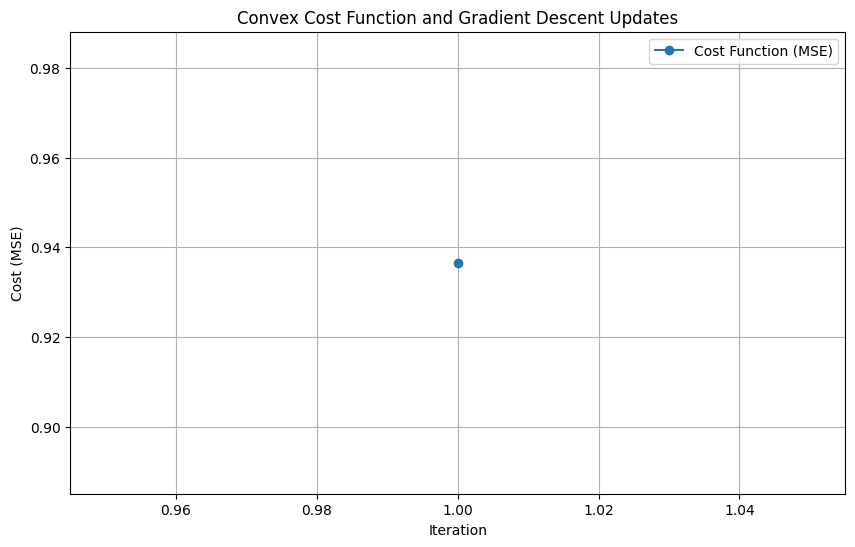

(0.785, 0.26, [0.9365375000000002])

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([1, 2, 3, 4])
y = np.array([0.5, 1.1, 1.4, 2.2])

# Initialize parameters
w = 0.0  # weight
b = 0.0  # bias
learning_rate = 0.1
n = len(X)  # Number of data points

# Number of updates to visualize
num_updates = 1

# Store cost values and parameter updates
costs = []
updates = []

# Mean Squared Error function
def compute_cost(X, y, w, b):
    predictions = w * X + b
    print('y_dash',predictions)
    return np.mean((y - predictions) ** 2)

# Gradient Descent updates
for _ in range(num_updates):
    # Predictions-
    predictions = w * X + b
    
    # Compute gradients
    dw = 2 / n * np.sum(X * (predictions-y))
    db = 2 / n * np.sum(predictions-y)
    
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db
    print("___New iteration___")
    print(predictions)
    print(w)
    print(b)
    
    # Compute cost and save updates
    cost = compute_cost(X, y, w, b)
    costs.append(cost)
    updates.append((w, b))

# Plotting the cost function (convex curve)
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_updates + 1), costs, marker='o', label="Cost Function (MSE)")
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Convex Cost Function and Gradient Descent Updates")
plt.grid()
plt.legend()
plt.show()

# Display the final weight, bias, and cost values
w, b, costs


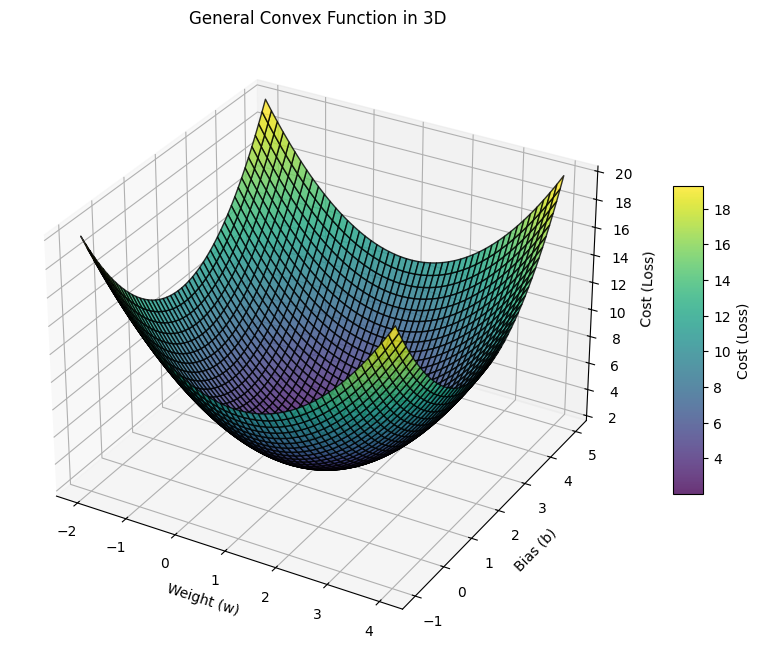

In [10]:
# Generate a general convex function for visualization
# Define a sample convex function: f(w, b) = (w-1)^2 + (b-2)^2 + 2

# Generate grid for weights (w) and bias (b)
w_vals = np.linspace(-2, 4, 50)
b_vals = np.linspace(-1, 5, 50)
W, B = np.meshgrid(w_vals, b_vals)

# Compute the convex function
Z = (W - 1)**2 + (B - 2)**2 + 2

# Plot the convex function
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(W, B, Z, cmap='viridis', alpha=0.8, edgecolor='k')

# Labels and title
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost (Loss)')
ax.set_title('General Convex Function in 3D')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Cost (Loss)')

plt.show()


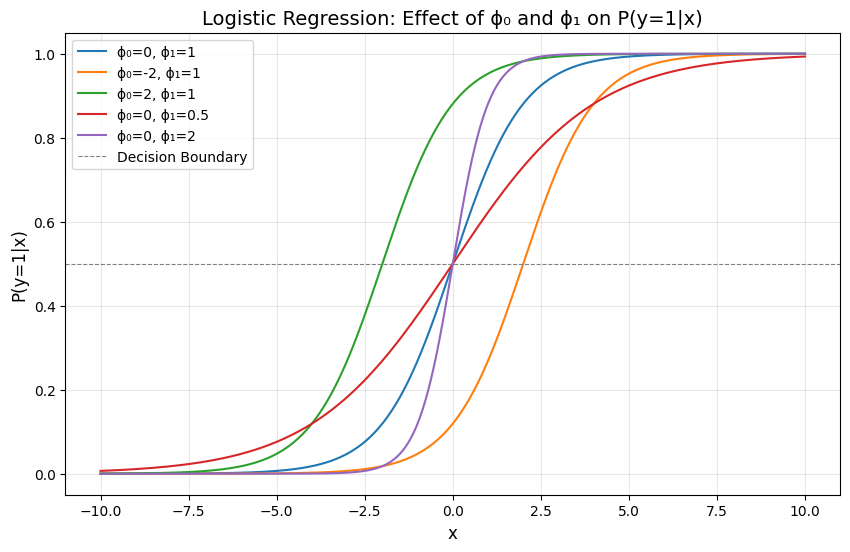

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate x values
x = np.linspace(-10, 10, 500)

# Define different parameter sets for phi0 and phi1
phi_params = [
    (0, 1),   # Baseline
    (-2, 1),  # Lower intercept
    (2, 1),   # Higher intercept
    (0, 0.5), # Lower slope
    (0, 2)    # Higher slope
]

# Plot the logistic functions for different parameter values
plt.figure(figsize=(10, 6))
for phi0, phi1 in phi_params:
    y = sigmoid(phi0 + phi1 * x)
    label = f"ϕ₀={phi0}, ϕ₁={phi1}"
    plt.plot(x, y, label=label)

# Add labels and legend
plt.title("Logistic Regression: Effect of ϕ₀ and ϕ₁ on P(y=1|x)", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("P(y=1|x)", fontsize=12)
plt.axhline(0.5, color="gray", linestyle="--", linewidth=0.8, label="Decision Boundary")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [19]:
import numpy as np
import pandas as pd

# Generate 10 data points with mean -1, std 1, label y=0
data_class_0 = np.random.normal(loc=-1, scale=1, size=10)
labels_class_0 = np.zeros(10)

# Generate 10 data points with mean 1, std 1, label y=1
data_class_1 = np.random.normal(loc=1, scale=1, size=10)
labels_class_1 = np.ones(10)

x = np.concatenate([data_class_0, data_class_1])  # Combine data points
y = np.concatenate([labels_class_0, labels_class_1]) 


In [22]:
x,y

(array([-1.13288058, -1.29779088, -1.30901297, -2.67600381,  0.15233156,
         0.07961859, -1.81336426, -2.46642433, -0.47893512, -1.57578797,
         1.14195316,  0.68067158,  1.69153875,  1.69474914,  0.27440262,
        -0.38336396, -0.5829384 ,  1.61037938, -0.18885926,  0.49318365]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]))

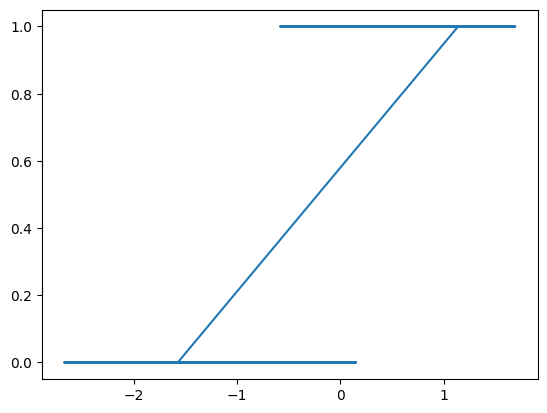

In [21]:
plt.plot(x, y)

plt.show()


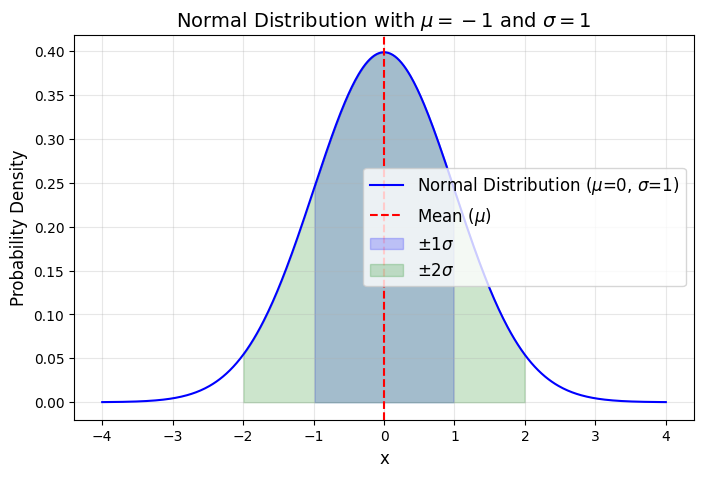

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters of the normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Generate x values for plotting
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)

# Compute the PDF of the normal distribution
pdf = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Plot the normal distribution
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label=f"Normal Distribution ($\mu$={mu}, $\sigma$={sigma})", color="blue")
plt.axvline(mu, color="red", linestyle="--", label="Mean ($\mu$)")
plt.fill_between(x, pdf, where=(x >= mu - sigma) & (x <= mu + sigma), color='blue', alpha=0.2, label="$\pm1\sigma$")
plt.fill_between(x, pdf, where=(x >= mu - 2*sigma) & (x <= mu + 2*sigma), color='green', alpha=0.2, label="$\pm2\sigma$")

# Add labels and legend
plt.title("Normal Distribution with $\mu = -1$ and $\sigma = 1$", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


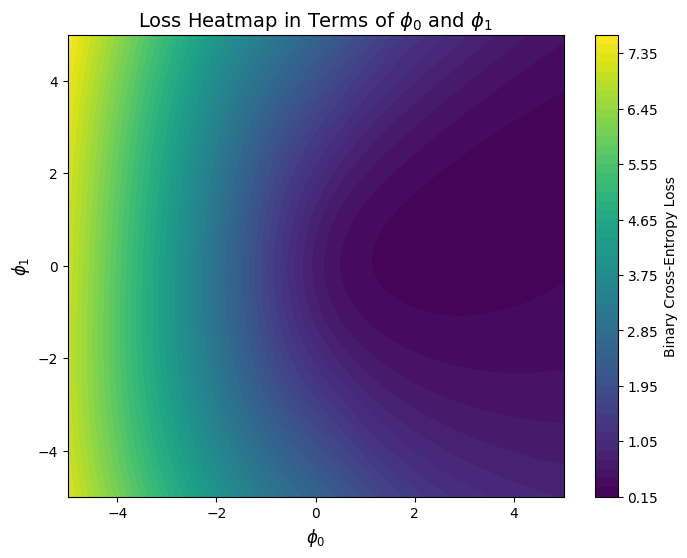

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data points
data_class_0 = np.random.normal(loc=-1, scale=1, size=10)
labels_class_0 = np.zeros(10)

data_class_1 = np.random.normal(loc=1, scale=1, size=10)
labels_class_1 = np.ones(10)

# Combine data and labels
x = np.concatenate([data_class_0, data_class_1])
y = np.concatenate([labels_class_0, labels_class_1])

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define binary cross-entropy loss function
def binary_cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Create a grid of ϕ0 and ϕ1 values
phi0_values = np.linspace(-5, 5, 100)
phi1_values = np.linspace(-5, 5, 100)
loss_values = np.zeros((len(phi0_values), len(phi1_values)))

# Calculate loss for each pair of (ϕ0, ϕ1)
for i, phi0 in enumerate(phi0_values):
    for j, phi1 in enumerate(phi1_values):
        z = phi0 + phi1 * x
        y_pred = sigmoid(z)
        loss_values[i, j] = binary_cross_entropy_loss(y, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.contourf(phi0_values, phi1_values, loss_values, levels=50, cmap="viridis")
plt.colorbar(label="Binary Cross-Entropy Loss")
plt.xlabel(r"$\phi_0$", fontsize=12)
plt.ylabel(r"$\phi_1$", fontsize=12)
plt.title("Loss Heatmap in Terms of $\phi_0$ and $\phi_1$", fontsize=14)
plt.show()


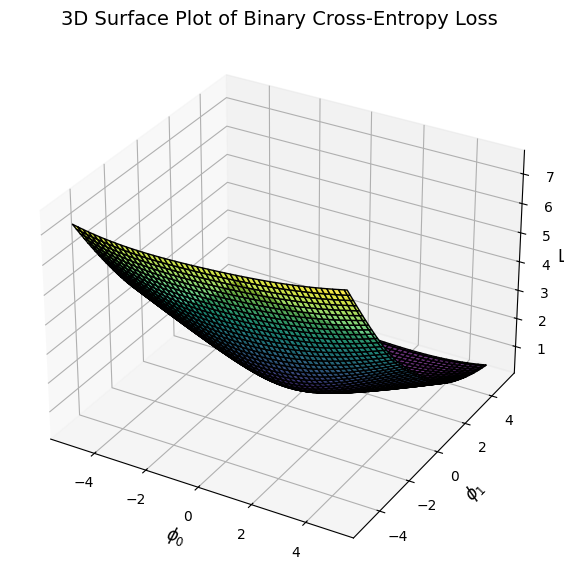

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot for the loss function
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Meshgrid for 3D plotting
phi0_grid, phi1_grid = np.meshgrid(phi0_values, phi1_values)

# Plot the surface
ax.plot_surface(phi0_grid, phi1_grid, loss_values.T, cmap="viridis", edgecolor='k', alpha=0.8)

# Labels and title
ax.set_xlabel(r"$\phi_0$", fontsize=12)
ax.set_ylabel(r"$\phi_1$", fontsize=12)
ax.set_zlabel("Loss", fontsize=12)
ax.set_title("3D Surface Plot of Binary Cross-Entropy Loss", fontsize=14)

plt.show()


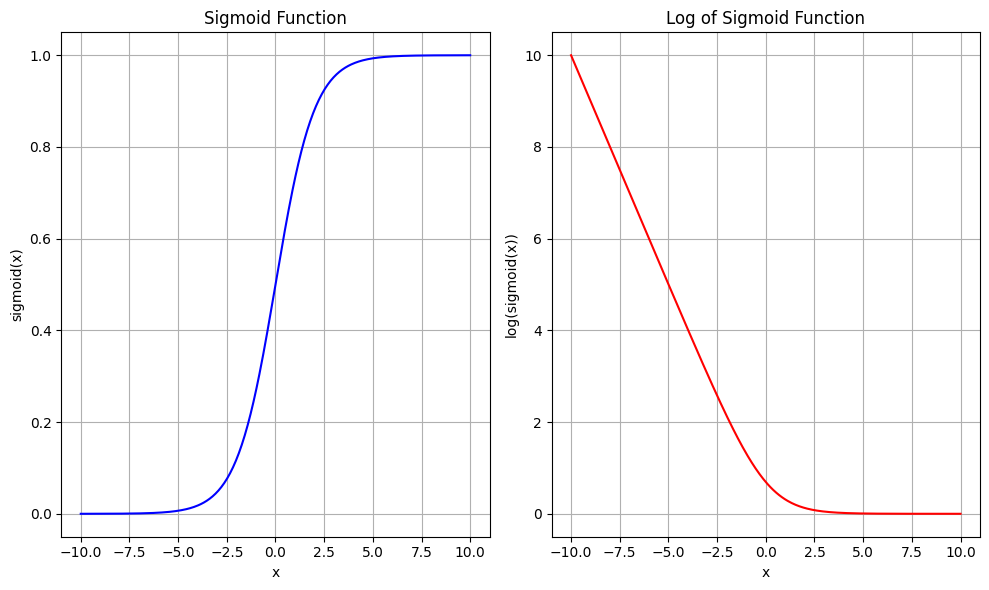

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function and log of sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_sigmoid(x):
    return np.log(sigmoid(x))

# Generate a range of x values
x = np.linspace(-10, 10, 400)

# Compute sigmoid and log(sigmoid)
sigmoid_values = sigmoid(x)
log_sigmoid_values = -log_sigmoid(x)

# Create the plots
plt.figure(figsize=(10, 6))

# Plot sigmoid
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid_values, label="Sigmoid", color='blue')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)

# Plot log(sigmoid)
plt.subplot(1, 2, 2)
plt.plot(x, log_sigmoid_values, label="Log(Sigmoid)", color='red')
plt.title('Log of Sigmoid Function')
plt.xlabel('x')
plt.ylabel('log(sigmoid(x))')
plt.grid(True)

plt.tight_layout()
plt.show()
